In [8]:
import numpy as np
from scipy.integrate import odeint

In [9]:
def lorenz_deriv(state, t, sigma=10.0, rho=28.0, beta=8.0/3.0):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

def generate_lorenz_data(
    initial_state=[1.0, 1.0, 1.0],
    tmax=25.0,
    dt=0.01,
    sigma=10.0,
    rho=28.0,
    beta=8.0/3.0
):
    
    num_steps = int(tmax / dt)
    t_vals = np.linspace(0, tmax, num_steps+1)
    sol = odeint(lorenz_deriv, initial_state, t_vals, args=(sigma, rho, beta))
    return t_vals, sol

In [12]:
from sklearn.preprocessing import StandardScaler

In [4]:
# 1) Generate Lorenz data
tmax = 110
dt   = 0.01
t_vals, lorenz_traj = generate_lorenz_data(
    initial_state=[1.0,1.0,1.0],
    tmax=tmax,
    dt=dt
)

washout = 1000
t_vals = t_vals[washout:]
lorenz_traj = lorenz_traj[washout:]

# normalize
scaler = StandardScaler()
scaler.fit(lorenz_traj)
lorenz_traj = scaler.transform(lorenz_traj)

T_data = len(lorenz_traj)
print(f"Data length: {T_data}, from t=0..{tmax} with dt={dt}.")

n_test_steps = 101

# train/test split
train_frac = 0.7
train_end = int(train_frac*(T_data-1))
train_input  = lorenz_traj[:train_end]
train_target = lorenz_traj[1:train_end+1]
test_input   = lorenz_traj[train_end:train_end+n_test_steps]
test_target  = lorenz_traj[train_end+1:train_end+n_test_steps+1]
print(f"Train size: {len(train_input)}  Test size: {len(test_input)}")

initial_in = test_input[0]

Data length: 10001, from t=0..110 with dt=0.01.
Train size: 7000  Test size: 101


In [5]:
t_vals = t_vals[train_end:train_end+n_test_steps]

In [6]:
t_vals

array([80.  , 80.01, 80.02, 80.03, 80.04, 80.05, 80.06, 80.07, 80.08,
       80.09, 80.1 , 80.11, 80.12, 80.13, 80.14, 80.15, 80.16, 80.17,
       80.18, 80.19, 80.2 , 80.21, 80.22, 80.23, 80.24, 80.25, 80.26,
       80.27, 80.28, 80.29, 80.3 , 80.31, 80.32, 80.33, 80.34, 80.35,
       80.36, 80.37, 80.38, 80.39, 80.4 , 80.41, 80.42, 80.43, 80.44,
       80.45, 80.46, 80.47, 80.48, 80.49, 80.5 , 80.51, 80.52, 80.53,
       80.54, 80.55, 80.56, 80.57, 80.58, 80.59, 80.6 , 80.61, 80.62,
       80.63, 80.64, 80.65, 80.66, 80.67, 80.68, 80.69, 80.7 , 80.71,
       80.72, 80.73, 80.74, 80.75, 80.76, 80.77, 80.78, 80.79, 80.8 ,
       80.81, 80.82, 80.83, 80.84, 80.85, 80.86, 80.87, 80.88, 80.89,
       80.9 , 80.91, 80.92, 80.93, 80.94, 80.95, 80.96, 80.97, 80.98,
       80.99, 81.  ])

In [4]:
import json
import pandas as pd

for i in range(1, 4):
    # Load the JSON file
    with open(f"mppr grid search lorenz2/lorenz{i}.json", "r") as f1:
        data = json.load(f1)

    # Extract relevant data
    records = []
    for entry in data:
        row = entry["params"].copy()  # get all params
        row["mean_T_VPT"] = entry["mean_T_VPT"]
        row["std_dev"] = entry["std_dev"]
        records.append(row)

    # Create DataFrame and save to CSV
    df = pd.DataFrame(records)
    df.to_csv(f"mppr grid search lorenz2/lorenz{i}.csv", index=False)

In [5]:
import pandas as pd
import os

# Set your directory path
csv_dir = "mppr grid search lorenz2/"

# List all CSV files
csv_files = [file for file in os.listdir(csv_dir) if file.endswith(".csv")]

# Combine all CSVs
df_list = [pd.read_csv(os.path.join(csv_dir, file)) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined CSV
combined_df.to_csv("combined_output.csv", index=False)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def lorenz_deriv(state, t, sigma=10.0, rho=28.0, beta=8.0/3.0):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

def generate_lorenz_data(
    initial_state=[1.0, 1.0, 1.0],
    tmax=25.0,
    dt=0.01,
    sigma=10.0,
    rho=28.0,
    beta=8.0/3.0
):
    num_steps = int(tmax / dt) + 1 # +1 to include t=0
    t_vals = np.linspace(0, tmax, num_steps)
    sol = odeint(lorenz_deriv, initial_state, t_vals, args=(sigma, rho, beta))
    return t_vals, sol
# 1) Generate Lorenz data
tmax = 250
dt   = 0.02
t_vals, lorenz_traj = generate_lorenz_data(
    initial_state=[1.0,1.0,1.0],
    tmax=tmax,
    dt=dt
)

washout = 2000
t_vals = t_vals[washout:]
lorenz_traj = lorenz_traj[washout:]

# normalize
scaler = StandardScaler()
scaler.fit(lorenz_traj)
lorenz_traj = scaler.transform(lorenz_traj)

T_data = len(lorenz_traj)
print(f"Data length: {T_data}, from t=0..{tmax} with dt={dt}.")

n_test_steps = 2100

# train/test split
train_frac = 0.8
train_end = int(train_frac*(T_data-1))
train_input  = lorenz_traj[:train_end]
train_target = lorenz_traj[1:train_end+1]
test_input   = lorenz_traj[train_end:train_end+n_test_steps]
test_target  = lorenz_traj[train_end+1:train_end+n_test_steps+1]
print(f"Train size: {len(train_input)}  Test size: {len(test_input)}")

initial_in = test_input[0]
# 4) partial trajectory
plot_len = min(500, n_test_steps)
time_test = np.linspace(train_end*dt, (train_end+plot_len)*dt, plot_len)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(test_target[:,0], test_target[:,1], test_target[:,2])
ax.set_title('Lorenz 3D Phase Plot')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

NameError: name 'odeint' is not defined

c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


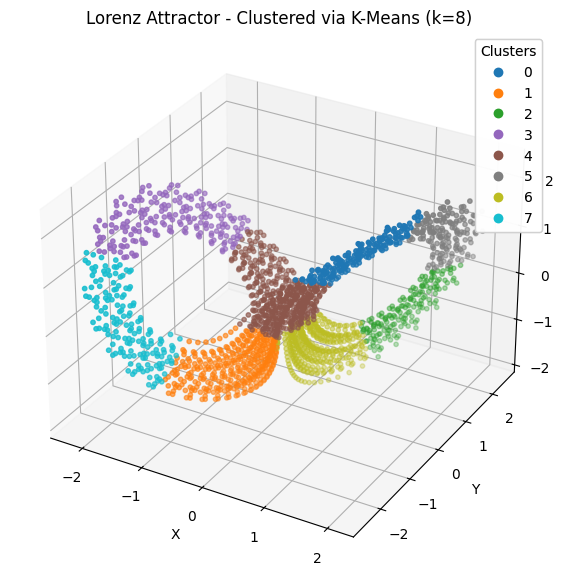

In [16]:
# Step 1: Apply KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(test_target)

# Step 2: Plot the clustered Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    test_target[:, 0],
    test_target[:, 1],
    test_target[:, 2],
    c=cluster_labels,
    cmap='tab10',
    s=10
)

ax.set_title("Lorenz Attractor - Clustered via K-Means (k={})".format(k))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
ax.add_artist(legend1)

plt.show()

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ----------------------------
# Define the Lorenz system (example)
# ----------------------------
def lorenz(t, state, sigma=10.0, rho=28.0, beta=8.0/3.0):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

# ----------------------------
# Compute the largest Lyapunov exponent
# ----------------------------
def lyapunov_exponent(system_func, t_max=100, dt=0.01, delta0=1e-8, transient=10.0):
    steps = int(t_max / dt)
    t_span = (0, dt)
    t_eval = [dt]

    x0 = np.random.rand(3) * 10.0
    y0 = x0 + delta0 * np.random.normal(size=3)
    y0 = x0 + delta0 * (y0 - x0) / np.linalg.norm(y0 - x0)

    le_sum = 0.0
    count = 0

    for i in range(steps):
        sol_x = solve_ivp(system_func, t_span, x0, t_eval=t_eval, args=())
        sol_y = solve_ivp(system_func, t_span, y0, t_eval=t_eval, args=())

        x1 = sol_x.y[:, -1]
        y1 = sol_y.y[:, -1]

        delta_vec = y1 - x1
        delta = np.linalg.norm(delta_vec)

        if i * dt > transient:  # skip initial transients
            le_sum += np.log(delta / delta0)
            count += 1

        # Renormalize the perturbation
        delta_vec = delta0 * delta_vec / delta
        y0 = x1 + delta_vec
        x0 = x1

    return le_sum / (count * dt)

# ----------------------------
# Run for Lorenz system
# ----------------------------
lyap_exp = lyapunov_exponent(lorenz, t_max=100, dt=0.01)
print("Largest Lyapunov Exponent (Lorenz):", lyap_exp)


Largest Lyapunov Exponent (Lorenz): 0.8635960474112321


In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import nolds

def lorenz(t, s, sigma=10., rho=28., beta=8/3):
    x, y, z = s
    return [
        sigma * (y - x),
        x*(rho - z) - y,
        x*y - beta*z
    ]

def gen_lorenz(n_steps=10000, dt=0.01):
    t = np.linspace(0, n_steps*dt, n_steps)
    sol = solve_ivp(lorenz, [t[0], t[-1]], [1,1,1], t_eval=t)
    return np.asarray(sol.y[0], dtype=np.float64)  # ensure 1D float64

ts = gen_lorenz()
lyap1 = nolds.lyap_r(ts, emb_dim=6, min_tsep=10)
print(f"Largest Lyapunov exponent ≈ {lyap1}")

Largest Lyapunov exponent ≈ 0.006747407550889294


In [7]:
import numpy as np
import lyapynov
from scipy.integrate import solve_ivp

# Lorenz system dynamics
def lorenz_f(x, t, sigma=10.0, rho=28.0, beta=8/3):
    dx = sigma * (x[1] - x[0])
    dy = x[0] * (rho - x[2]) - x[1]
    dz = x[0] * x[1] - beta * x[2]
    return np.array([dx, dy, dz])

# Jacobian of Lorenz
def lorenz_jac(x, t, sigma=10.0, rho=28.0, beta=8/3):
    x1, x2, x3 = x
    return np.array([
        [-sigma,  sigma,      0],
        [rho - x3, -1,      -x1],
        [x2,        x1,    -beta]
    ])

# Initial conditions and setup
x0 = np.array([1.0, 1.0, 1.0])
t0, dt = 0.0, 0.01
sys = lyapynov.ContinuousDS(x0, t0, lorenz_f, lorenz_jac, dt)

# Compute maximum Lyapunov exponent (after 200,000 steps skipping 100,000 transient)
mle = lyapynov.mLCE(sys, n_forward=100_000, n_compute=100_000, keep=False)
print("Estimated λ₁ (Lyapynov):", mle)


Estimated λ₁ (Lyapynov): 0.9121761751751014


In [8]:
# Rössler dynamics
def rossler_f(x, t, a=0.2, b=0.2, c=5.7):
    x1, x2, x3 = x
    dx1 = -x2 - x3
    dx2 = x1 + a * x2
    dx3 = b + x3 * (x1 - c)
    return np.array([dx1, dx2, dx3])

# Jacobian of the Rössler system
def rossler_jac(x, t, a=0.2, b=0.2, c=5.7):
    x1, x2, x3 = x
    return np.array([
        [0.0, -1.0, -1.0],
        [1.0,  a,    0.0],
        [x3,   0.0,  x1 - c]
    ])

x0 = np.array([1.0, 0.0, 0.0])
dt = 0.01
sys = lyapynov.ContinuousDS(x0, 0.0, rossler_f, rossler_jac, dt)

# Estimate the maximum Lyapunov exponent
max_lyap = lyapynov.mLCE(sys, n_forward=100_000, n_compute=100_000, keep=False)
print("Max Lyapunov exponent (Rössler):", max_lyap)

Max Lyapunov exponent (Rössler): 0.07596891413851309


In [10]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

def max_lyapunov_exponent(traj, emb_dim=10, tau=1, min_tsep=10, fit_range=(0, 20)):
    """
    Estimate maximal Lyapunov exponent using Rosenstein's method.
    
    Parameters:
        traj (array): 1D time series (e.g., x(t))
        emb_dim (int): embedding dimension
        tau (int): time delay
        min_tsep (int): minimal temporal separation for nearest neighbors
        fit_range (tuple): range of times to fit slope for exponent

    Returns:
        lyapunov_exp: estimated maximal Lyapunov exponent
    """
    # Step 1: Time-delay embedding
    N = len(traj) - (emb_dim - 1) * tau
    Y = np.array([traj[i:i + emb_dim * tau:tau] for i in range(N)])

    # Step 2: Find nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=2).fit(Y)
    distances, indices = nbrs.kneighbors(Y)
    
    # Avoid temporal neighbors
    for i in range(len(indices)):
        if abs(indices[i, 1] - i) < min_tsep:
            distances[i, 1] = np.inf
            valid = np.where(np.abs(np.arange(len(Y)) - i) >= min_tsep)[0]
            new_idx = valid[np.argmin(np.linalg.norm(Y[valid] - Y[i], axis=1))]
            indices[i, 1] = new_idx

    # Step 3: Track divergence
    max_iter = min(100, N)  # number of steps to track divergence
    div = np.zeros((N, max_iter))
    for i in range(N):
        j = indices[i, 1]
        for n in range(max_iter):
            if i + n >= N or j + n >= N:
                break
            dist = np.linalg.norm(Y[i + n] - Y[j + n])
            if dist > 0:
                div[i, n] = np.log(dist)

    # Average over all pairs
    mean_div = np.mean(div, axis=0)
    t = np.arange(len(mean_div))

    # Fit linear part
    fit_start, fit_end = fit_range
    slope, _ = np.polyfit(t[fit_start:fit_end], mean_div[fit_start:fit_end], 1)

    # Plot (optional)
    plt.plot(t, mean_div, label='Mean divergence')
    plt.plot(t[fit_start:fit_end], slope * t[fit_start:fit_end] + mean_div[fit_start] - slope * t[fit_start], 'r--', label='Fit')
    plt.xlabel("Time steps")
    plt.ylabel("Log divergence")
    plt.legend()
    plt.title("Estimate of Max Lyapunov Exponent")
    plt.show()

    return slope

In [14]:
tmax = 250
dt = 0.02
t_vals, lorenz_traj = generate_lorenz_data(
    initial_state=[1.0, 1.0, 1.0],
    tmax=tmax,
    dt=dt
)

# 4) Drop washout, then scale to [0, 1]
washout = 2000
t_vals = t_vals[washout:]
lorenz_traj = lorenz_traj[washout:]

train_frac = 0.5

scaler = StandardScaler()
scaler.fit(lorenz_traj)
lorenz_traj = scaler.transform(lorenz_traj)

# 5) Split into train vs. test
T_data = len(lorenz_traj)
train_end = int(train_frac * (T_data - 1))
train_input = lorenz_traj[:train_end]
train_target = lorenz_traj[1 : train_end + 1]
test_input = lorenz_traj[train_end : -1]
test_target = lorenz_traj[train_end + 1 : ]
n_test_steps = len(test_input)
initial_in = test_input[0]

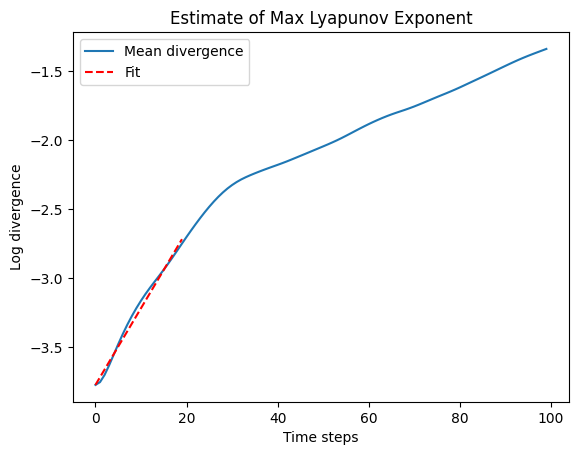

np.float64(0.05556702928009794)

In [18]:
max_lyapunov_exponent(lorenz_traj[:, 2])

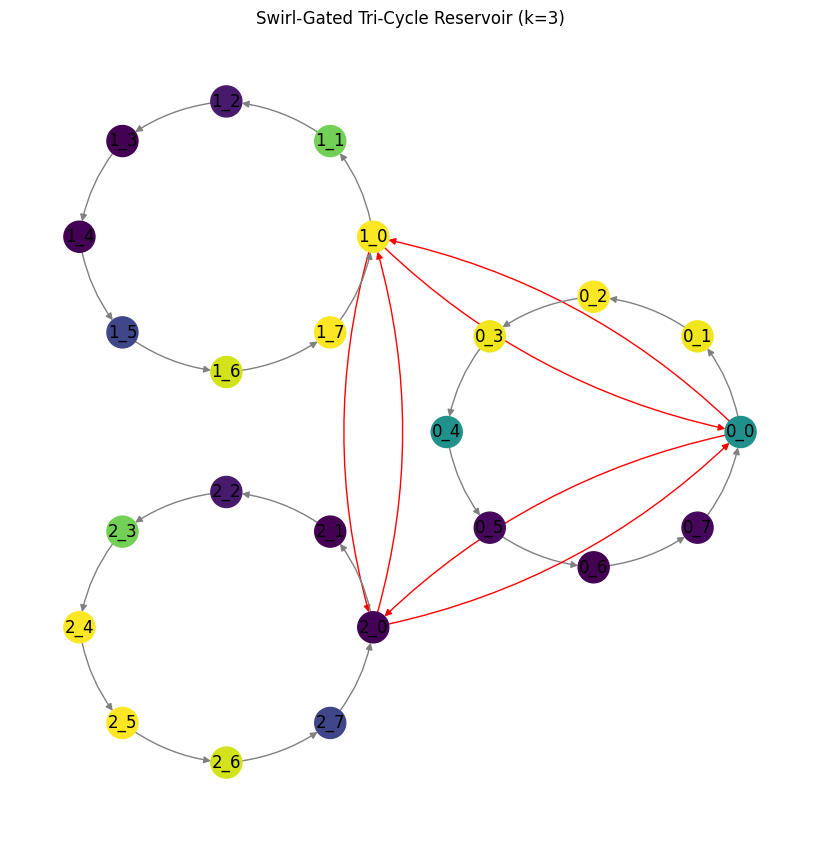

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Configuration
k = 3                 # Number of rings
m = 8                 # Neurons per ring
N = k * m             # Total neurons
radius = 2            # Distance of each ring from center
bridge_color = 'red'  # Color for bridge connections
intra_color = 'gray'  # Color for intra-ring edges
swirl_beta = 5
swirl_omega = np.pi / 4

# Create the graph
G = nx.DiGraph()

# Helper: get position on a circle
def circular_layout(center, radius, n_points, ring_id):
    angles = np.linspace(0, 2*np.pi, n_points, endpoint=False)
    return {
        f"{ring_id}_{i}": (
            center[0] + radius * np.cos(angle),
            center[1] + radius * np.sin(angle)
        )
        for i, angle in enumerate(angles)
    }

# Step 1: Add neurons in rings and intra-ring edges
positions = {}
colors = []
for c in range(k):
    center_angle = 2 * np.pi * c / k
    center_pos = (radius * np.cos(center_angle), radius * np.sin(center_angle))
    ring_pos = circular_layout(center_pos, 1.2, m, c)
    positions.update(ring_pos)

    # Add nodes and intra-ring connections
    for i in range(m):
        node = f"{c}_{i}"
        G.add_node(node)
        # Swirl gate: compute activation strength
        swirl_val = 1 / (1 + np.exp(-swirl_beta * np.sin(swirl_omega * i + 2 * np.pi * c / k)))
        colors.append(swirl_val)

        next_node = f"{c}_{(i+1)%m}"
        G.add_edge(node, next_node, color=intra_color)

# Step 2: Add bridge connections (between first neurons)
for c in range(k):
    src = f"{c}_{0}"
    tgt = f"{(c+1)%k}_{0}"
    G.add_edge(src, tgt, color=bridge_color)
    G.add_edge(tgt, src, color=bridge_color)

# Step 3: Draw the graph
edge_colors = [G[u][v]['color'] for u,v in G.edges]
node_colors = colors  # swirl activation coloring

plt.figure(figsize=(8, 8))
nx.draw(
    G, 
    pos=positions, 
    with_labels=True, 
    node_color=node_colors, 
    edge_color=edge_colors, 
    node_size=500, 
    cmap=plt.cm.viridis,
    arrows=True,
    connectionstyle="arc3,rad=0.15"
)
plt.title("Swirl-Gated Tri-Cycle Reservoir (k=3)")
plt.axis('off')
plt.show()


In [2]:
import json
import statistics

def filter_seed_scores(scores):
    filtered = []
    i = 5
    while i < len(scores):
        filtered.extend(scores[i:i+10])
        i += 5
    return filtered

for i in range(1, 16):
    # Load the JSON data
    with open(f"mppr grid search lorenz/lorenz{i}.json", "r") as f1:
        data = json.load(f1)

    # Process each entry
    for entry in data:
        # Filter seed scores
        filtered_scores = filter_seed_scores(entry["seed_scores"])
        entry["seed_scores"] = filtered_scores
        
        # Update mean and standard deviation
        if len(filtered_scores) > 1:
            entry["mean_T_VPT"] = statistics.mean(filtered_scores)
            entry["std_dev"] = statistics.stdev(filtered_scores)
        elif len(filtered_scores) == 1:
            entry["mean_T_VPT"] = filtered_scores[0]
            entry["std_dev"] = 0.0
        else:
            entry["mean_T_VPT"] = 0.0
            entry["std_dev"] = 0.0

    # Save the modified data
    with open(f"mppr grid search lorenz2/lorenz{i}.json", "w") as f1:
        json.dump(data, f1, indent=2)
